<a href="https://colab.research.google.com/github/AlvaroUriel/idal_ia3/blob/main/Test_listar_dataset_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Analisis previo dataset


In [1]:
from  google.colab import drive
 
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import os
import numpy as np
import pandas as pd

In [3]:
train_path = '/content/drive/MyDrive/IA3/Datasets/Food-11/training'
test_path   ='/content/drive/MyDrive/IA3/Datasets/Food-11/evaluation'
val_path   = '/content/drive/MyDrive/IA3/Datasets/Food-11/validation'

In [4]:
class_names = ['Bread', 'Dairy product', 'Dessert', 'Egg', 'Fried food',
               'Meat', 'Noodles/Pasta', 'Rice', 'Seafood', 'Soup', 'Vegetable/Fruit']
class_names

['Bread',
 'Dairy product',
 'Dessert',
 'Egg',
 'Fried food',
 'Meat',
 'Noodles/Pasta',
 'Rice',
 'Seafood',
 'Soup',
 'Vegetable/Fruit']

In [5]:
#Creamos listas con todos los nombres de los ficheros 
train_files = [os.path.join(train_path,img) for img in os.listdir(train_path)]
test_files  = [os.path.join(test_path,img)  for img in os.listdir(test_path)]
val_files   = [os.path.join(val_path,img)   for img in os.listdir(val_path)]

In [6]:
#Observamos como estan nombrados los ficheros
print(train_files[0])
print(test_files[0])
print(val_files[0])

/content/drive/MyDrive/IA3/Datasets/Food-11/training/0_869.jpg
/content/drive/MyDrive/IA3/Datasets/Food-11/evaluation/9_242.jpg
/content/drive/MyDrive/IA3/Datasets/Food-11/validation/9_213.jpg


In [7]:
#Creamos listas con la clase del fichero, para cada fichero
train_y = [int(img.split("/")[-1].split("_")[0]) for img in train_files]
test_y  = [int(img.split("/")[-1].split("_")[0]) for img in test_files]
val_y   = [int(img.split("/")[-1].split("_")[0]) for img in val_files]


In [8]:
#Creamos un diccionario para unir las rutas y su clase
d_train_y = {'Rutas':train_files,'Clases':train_y}
d_test_y  = {'Rutas':test_files, 'Clases':test_y}
d_val_y   = {'Rutas':val_files,  'Clases':val_y}

In [9]:
#Convertimos el diccionario a un dataFrame de pandas
df_train_y = pd.DataFrame(d_train_y)
df_test_y  = pd.DataFrame(d_test_y)
df_val_y   = pd.DataFrame(d_val_y)

df_train_y.head(4)

,Rutas,Clases
0,/content/drive/MyDrive/IA3/Datasets/Food-11/tr...,0
1,/content/drive/MyDrive/IA3/Datasets/Food-11/tr...,0
2,/content/drive/MyDrive/IA3/Datasets/Food-11/tr...,0
3,/content/drive/MyDrive/IA3/Datasets/Food-11/tr...,0


In [10]:
#Observamos si las clases estan balanceadas en cuanto a número de muestras
print(df_train_y["Clases"].value_counts())
print( df_test_y["Clases"].value_counts())
print(  df_val_y["Clases"].value_counts())

9     1501
2     1501
5     1325
0      996
3      987
8      856
4      848
10     709
6      441
1      429
7      280
Name: Clases, dtype: int64
9     500
2     500
5     432
0     368
3     335
8     303
4     287
10    231
1     148
6     147
7      96
Name: Clases, dtype: int64
9     500
2     500
5     449
0     362
8     347
3     327
4     326
10    232
6     147
1     144
7      96
Name: Clases, dtype: int64


In [11]:
#De la celda anterior podemos ver que no, que hay clases con mas muestras que otras

In [12]:
#Observemos ahora si estan balanceadas las divisiones, train, test y val
total_clases = df_train_y["Clases"].value_counts()+df_test_y["Clases"].value_counts()+df_val_y["Clases"].value_counts()

for index, value in df_train_y["Clases"].value_counts().items():
  print (str(index).zfill(2), str(total_clases[index]).zfill(4),
         '{0:.4f}'.format(df_train_y["Clases"].value_counts()[index] / total_clases[index]),
          '{0:.4f}'.format(df_test_y["Clases"].value_counts()[index] / total_clases[index]),
           '{0:.4f}'.format(df_val_y["Clases"].value_counts()[index] / total_clases[index]))

09 2501 0.6002 0.1999 0.1999
02 2501 0.6002 0.1999 0.1999
05 2206 0.6006 0.1958 0.2035
00 1726 0.5771 0.2132 0.2097
03 1649 0.5985 0.2032 0.1983
08 1506 0.5684 0.2012 0.2304
04 1461 0.5804 0.1964 0.2231
10 1172 0.6049 0.1971 0.1980
06 0735 0.6000 0.2000 0.2000
01 0721 0.5950 0.2053 0.1997
07 0472 0.5932 0.2034 0.2034


In [13]:
#De la celda anterior podemos ver que las divisiones train, test y val sí estan balenceadas
#independientemente de la clase en un (60,20,20) aproximadamente.

In [14]:
#Vamos a probar un clasificador con las clases 1, 3, 6
print(class_names[0])
print(class_names[1])
print(class_names[2])

Bread
Dairy product
Dessert


In [15]:
#Vamos a seleccionar solo n ficheros de cada clase para que esten las clases balanceadas
n_samples_val   = 40                      #20%
n_samples_test  = n_samples_val           #20%
n_samples_train = n_samples_val * 3       #60%

sel_clases=[0,1,2]

#Train
list_train = []
for cl in sel_clases:
  df_train_y_sort=df_train_y[df_train_y['Clases']==cl]
  list_train += df_train_y_sort.iloc[0:n_samples_train, 0].tolist()


list_test = []
for cl in sel_clases:
  df_test_y_sort=df_test_y[df_test_y['Clases']==cl]
  list_test += df_test_y_sort.iloc[0:n_samples_test, 0].tolist()

list_val = []
for cl in sel_clases:
  df_val_y_sort=df_val_y[df_val_y['Clases']==cl]
  list_val += df_val_y_sort.iloc[0:n_samples_val, 0].tolist()

list_train

['/content/drive/MyDrive/IA3/Datasets/Food-11/training/0_869.jpg',
 '/content/drive/MyDrive/IA3/Datasets/Food-11/training/0_767.jpg',
 '/content/drive/MyDrive/IA3/Datasets/Food-11/training/0_359.jpg',
 '/content/drive/MyDrive/IA3/Datasets/Food-11/training/0_36.jpg',
 '/content/drive/MyDrive/IA3/Datasets/Food-11/training/0_379.jpg',
 '/content/drive/MyDrive/IA3/Datasets/Food-11/training/0_916.jpg',
 '/content/drive/MyDrive/IA3/Datasets/Food-11/training/0_413.jpg',
 '/content/drive/MyDrive/IA3/Datasets/Food-11/training/0_203.jpg',
 '/content/drive/MyDrive/IA3/Datasets/Food-11/training/0_338.jpg',
 '/content/drive/MyDrive/IA3/Datasets/Food-11/training/0_174.jpg',
 '/content/drive/MyDrive/IA3/Datasets/Food-11/training/0_29.jpg',
 '/content/drive/MyDrive/IA3/Datasets/Food-11/training/0_876.jpg',
 '/content/drive/MyDrive/IA3/Datasets/Food-11/training/0_45.jpg',
 '/content/drive/MyDrive/IA3/Datasets/Food-11/training/0_963.jpg',
 '/content/drive/MyDrive/IA3/Datasets/Food-11/training/0_726.jpg'

##Tramiento de datos


In [16]:
import random

import numpy as np
import matplotlib.pyplot as plt;
import matplotlib.image as img
from numpy.core.fromnumeric import argmax
 


# Keras
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

from keras.utils import np_utils
from keras.preprocessing.image import load_img, img_to_array
from keras.applications import imagenet_utils
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50

from sklearn.metrics import confusion_matrix, accuracy_score

from keras.utils.vis_utils import model_to_dot
from keras.models import Sequential, load_model, Model
from IPython.display import SVG, display, clear_output


In [17]:
# istas con todos los nombres de los ficheros 
len(list_train),len(list_test),len(list_val)

(360, 120, 120)

In [18]:
#Troceamos por la ultima '/' y por '_' para quedarnos el primer numero y lo pasamos a entero
train_y = [int(img.split("/")[-1].split("_")[0]) for img in list_train]
test_y = [int(img.split("/")[-1].split("_")[0]) for img in list_test]
val_y = [int(img.split("/")[-1].split("_")[0]) for img in list_val]

num_classes = len(sel_clases)

#One hot encoding para tener las etiquetas
y_train = np_utils.to_categorical(train_y, num_classes)
y_val = np_utils.to_categorical(val_y, num_classes)
y_test = np_utils.to_categorical(test_y, num_classes)

y_train

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

Datos de entrenamiento en:  3 clases
[120, 120, 120]


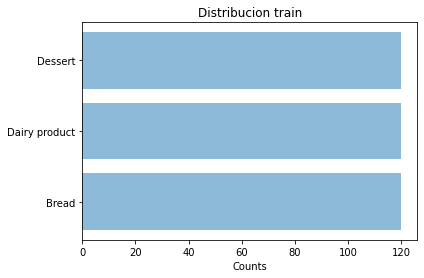

In [19]:
print("Datos de entrenamiento en: ", num_classes, "clases")
print([train_y.count(i) for i in range(num_classes)])
 
food_classes=[]
for name in sel_clases:
  food_classes+=[class_names[name]]
 
y_pos = np.arange(len(food_classes))
counts = [train_y.count(i) for i in range(num_classes)]
 
plt.barh(y_pos, counts, align='center', alpha=0.5)
plt.yticks(y_pos, food_classes)
plt.xlabel('Counts')
plt.title('Distribucion train')
 
plt.show()

Datos de test en:  3 clases
[40, 40, 40]


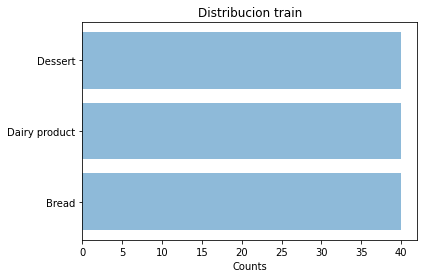

In [20]:
print("Datos de test en: ", num_classes, "clases")
print([test_y.count(i) for i in range(num_classes)])
 
food_classes=[]
for name in sel_clases:
  food_classes+=[class_names[name]]
 
y_pos = np.arange(len(food_classes))
counts = [test_y.count(i) for i in range(num_classes)]
 
plt.barh(y_pos, counts, align='center', alpha=0.5)
plt.yticks(y_pos, food_classes)
plt.xlabel('Counts')
plt.title('Distribucion train')
 
plt.show()

Datos de validacion en:  3 clases
[40, 40, 40]


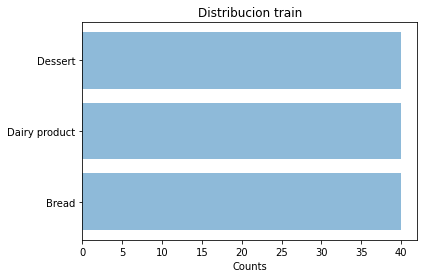

In [21]:
print("Datos de validacion en: ", num_classes, "clases")
print([val_y.count(i) for i in range(num_classes)])
 
food_classes=[]
for name in sel_clases:
  food_classes+=[class_names[name]]
 
y_pos = np.arange(len(food_classes))
counts = [val_y.count(i) for i in range(num_classes)]
 
plt.barh(y_pos, counts, align='center', alpha=0.5)
plt.yticks(y_pos, food_classes)
plt.xlabel('Counts')
plt.title('Distribucion train')
 
plt.show()

In [22]:
#Clase para mostrar imagenes
def show_imgs(X):
    plt.figure(figsize=(12, 12))
    
#   k = 0
    for i in range(0,3):
        for j in range(0,3):
            k = random.randint(0, len(X)-1)
            image = load_img(X[k], target_size=(224, 224))
            ax = plt.subplot2grid((3,3),(i,j),)  
            ax.set_title('Clase: ' + str(train_y[k]) )     
            plt.imshow(image)            
#           k = k+1
    #Muestra
    plt.show()

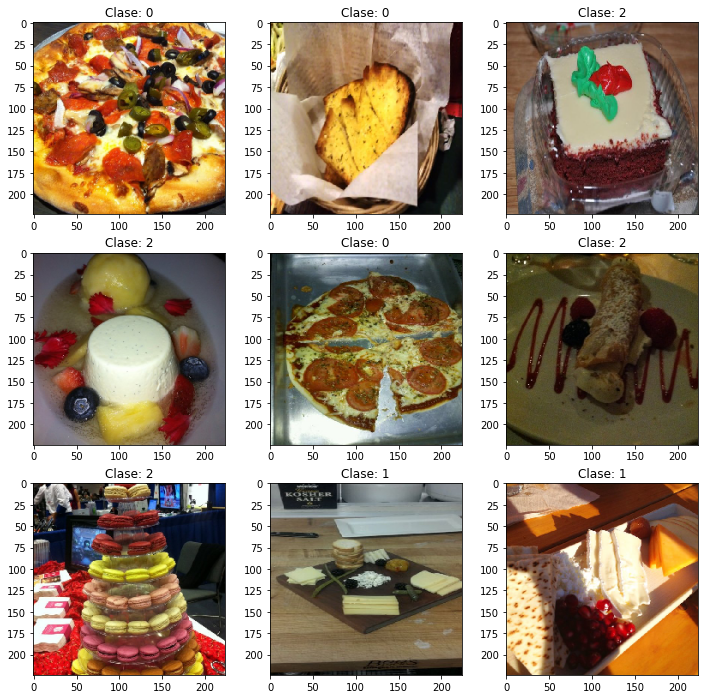

In [23]:
show_imgs(list_train)

In [24]:
def create_features(dataset):
 
    x_scratch = []

    k=0

    #Bucle sobre las imagenes
    for imagePath in dataset:
 
        #Se cargan las imagenes a tamaño 224
        image = load_img(imagePath, target_size=(224, 224))
        image = img_to_array(image)

        #Preprocesado expandiendo dimensiones y restando la media de RGB en ImageNet
        image = np.expand_dims(image, axis=0)
        image = imagenet_utils.preprocess_input(image)
 
        # add the image to the batch
        x_scratch.append(image)

        k = k+1
        print('convertida:', k, ' de ', len(dataset))
 
    x = np.vstack(x_scratch)
    return x

In [25]:
train_x = create_features(list_train)
val_x   = create_features(list_val)
test_x  = create_features(list_test)
print(train_x.shape)
print(val_x.shape)
print(test_x.shape)

convertida: 1  de  360
convertida: 2  de  360
convertida: 3  de  360
convertida: 4  de  360
convertida: 5  de  360
convertida: 6  de  360
convertida: 7  de  360
convertida: 8  de  360
convertida: 9  de  360
convertida: 10  de  360
convertida: 11  de  360
convertida: 12  de  360
convertida: 13  de  360
convertida: 14  de  360
convertida: 15  de  360
convertida: 16  de  360
convertida: 17  de  360
convertida: 18  de  360
convertida: 19  de  360
convertida: 20  de  360
convertida: 21  de  360
convertida: 22  de  360
convertida: 23  de  360
convertida: 24  de  360
convertida: 25  de  360
convertida: 26  de  360
convertida: 27  de  360
convertida: 28  de  360
convertida: 29  de  360
convertida: 30  de  360
convertida: 31  de  360
convertida: 32  de  360
convertida: 33  de  360
convertida: 34  de  360
convertida: 35  de  360
convertida: 36  de  360
convertida: 37  de  360
convertida: 38  de  360
convertida: 39  de  360
convertida: 40  de  360
convertida: 41  de  360
convertida: 42  de  360
c

##Generación Modelo

In [26]:
# Checkpointer
checkpointer = ModelCheckpoint(filepath='model.best.hdf5',
                               verbose=1,save_best_only=True)

In [27]:
def plot_accuracy_loss(history):
    fig = plt.figure(figsize=(10,5))
 
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.ylim([0, 1])
 
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
 


In [28]:
mi_model = Sequential()

mi_model.add(Conv2D(32, (3,3), activation='relu', input_shape=train_x.shape[1:]))
mi_model.add(MaxPooling2D((2,2)))
mi_model.add(Dropout(0.3))
mi_model.add(Conv2D(32, (3,3), activation='relu'))
mi_model.add(MaxPooling2D((2,2)))
mi_model.add(Dropout(0.3))
mi_model.add(Conv2D(32, (3,3), activation='relu'))
mi_model.add(MaxPooling2D((2,2)))
mi_model.add(Dropout(0.3))
mi_model.add(Conv2D(64, (3,3), activation='relu'))
mi_model.add(MaxPooling2D((2,2)))
mi_model.add(Conv2D(128, (3,3), activation='relu'))
mi_model.add(MaxPooling2D((2,2)))
mi_model.add(Flatten())

mi_model.add(Dense(64, activation='relu'))
mi_model.add(Dropout(0.3))
mi_model.add(Dense(32, activation='relu'))
mi_model.add(Dropout(0.3))
mi_model.add(Dense(num_classes, activation='softmax'))



In [29]:
mi_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 32)        0

In [30]:
opt = Adam(lr=0.00001)
mi_model.compile(loss='categorical_crossentropy',optimizer="rmsprop", metrics=['accuracy'])

history = mi_model.fit(train_x, y_train, batch_size=32, epochs=50,
          validation_data=(val_x, y_val), callbacks=[checkpointer],verbose=1, shuffle=True)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
12/12 [==============================] - ETA: 0s - loss: 21.0984 - accuracy: 0.3222
Epoch 1: val_loss improved from inf to 1.10199, saving model to model.best.hdf5
12/12 [==============================] - 6s 176ms/step - loss: 21.0984 - accuracy: 0.3222 - val_loss: 1.1020 - val_accuracy: 0.3667
Epoch 2/50
11/12 [==========================>...] - ETA: 0s - loss: 1.3149 - accuracy: 0.3409
Epoch 2: val_loss improved from 1.10199 to 1.07472, saving model to model.best.hdf5
12/12 [==============================] - 1s 100ms/step - loss: 1.3043 - accuracy: 0.3472 - val_loss: 1.0747 - val_accuracy: 0.4083
Epoch 3/50
11/12 [==========================>...] - ETA: 0s - loss: 1.1955 - accuracy: 0.4006
Epoch 3: val_loss improved from 1.07472 to 1.05281, saving model to model.best.hdf5
12/12 [==============================] - 1s 102ms/step - loss: 1.1925 - accuracy: 0.4000 - val_loss: 1.0528 - val_accuracy: 0.4417
Epoch 4/50
11/12 [==========================>...] - ETA: 0s - loss: 1.2043 

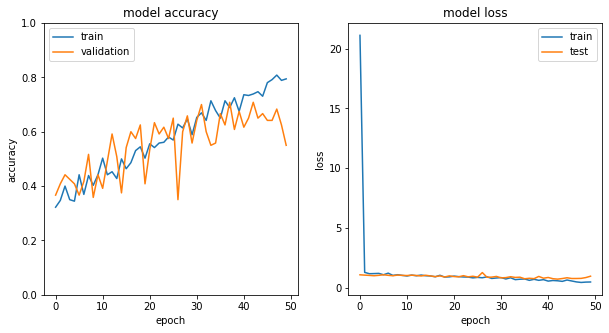

In [31]:
plot_accuracy_loss(history)

In [32]:
preds = np.argmax(mi_model.predict(test_x), axis=1)
print("Accuracy en Test: ", accuracy_score(test_y, preds))
print("Número de imagenes identificadas correctamente: ",
      accuracy_score(test_y, preds, normalize=False), "/", len(test_y),"\n")
confusion_matrix(test_y, preds, labels=range(0,num_classes))

Accuracy en Test:  0.525
Número de imagenes identificadas correctamente:  63 / 120 



array([[ 8, 12, 20],
       [ 7, 24,  9],
       [ 2,  7, 31]])

In [33]:
preds = np.argmax(mi_model.predict(val_x), axis=1)
print("Accuracy en Validación: ", accuracy_score(val_y, preds))
print("Número de imagenes identificadas correctamente: ",
      accuracy_score(val_y, preds, normalize=False), "/", len(val_y),"\n")
confusion_matrix(val_y, preds, labels=range(0,num_classes))

Accuracy en Validación:  0.55
Número de imagenes identificadas correctamente:  66 / 120 



array([[13, 11, 16],
       [ 3, 24, 13],
       [ 3,  8, 29]])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________





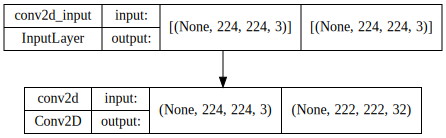

In [34]:
# salida de una sola capa
ncapa = 0
#intermediate_layer_model = Model(inputs=model.input,
#                                 outputs=model.layers[ncapa].output)

intermediate_layer_model = Model(inputs=mi_model.input,
                                 outputs=mi_model.layers[ncapa].output)

intermediate_layer_model.summary()
print("\n\n")

display(SVG(model_to_dot(intermediate_layer_model,show_shapes=True,dpi=72).create(prog='dot', format='svg')))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


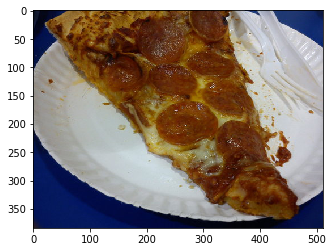

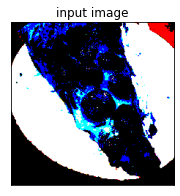

Salidas capa conv2d (1, 222, 222, 32)


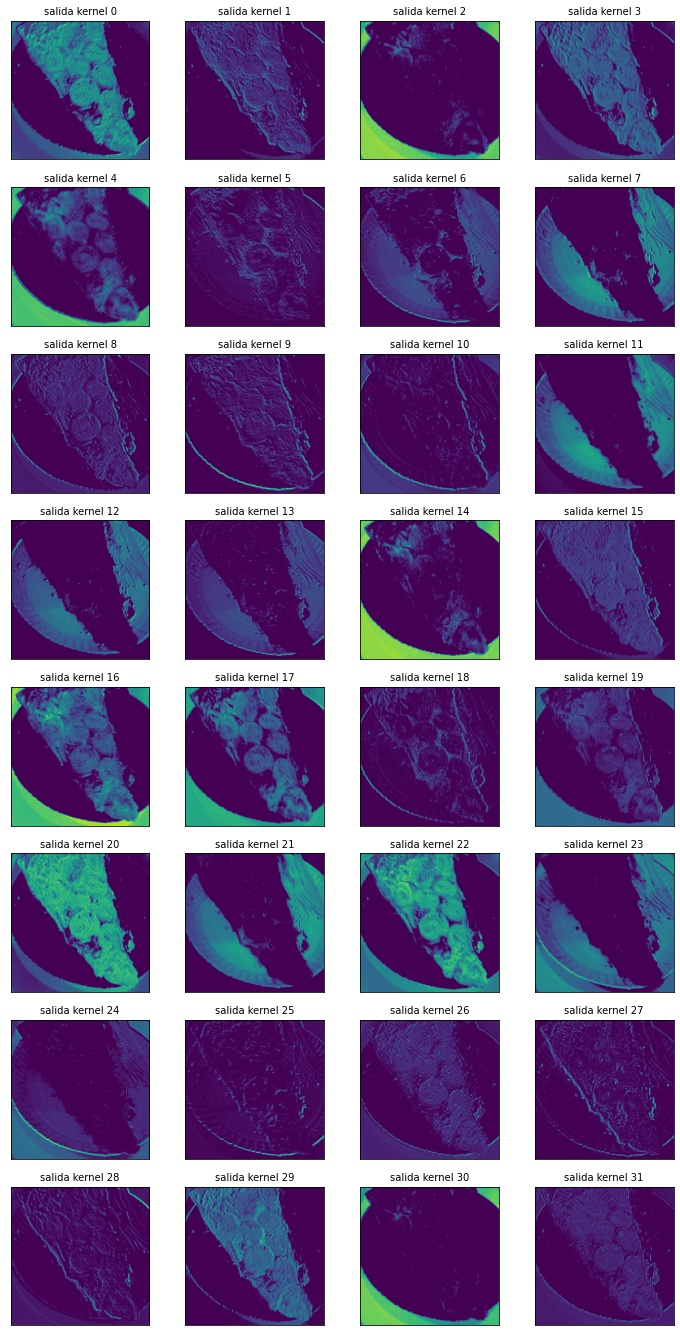

In [83]:
ejemplo = 16

img_mia = list_val[ejemplo]
image = img.imread(img_mia)
plt.imshow(image[:,:,:], cmap='gray', vmin = 0, vmax = 255,interpolation='none')

imagen = val_x[ejemplo]
aux = np.expand_dims(imagen, axis=0)
salida_capa = intermediate_layer_model.predict(aux)

plt.figure(figsize=(3,3))
plt.imshow(imagen, cmap='gray')
plt.title('input image', size=12)
plt.xticks(())
plt.yticks(())
plt.show()

print("Salidas capa "+intermediate_layer_model.layers[-1].name, salida_capa.shape)

nsalidas = salida_capa.shape[-1]
ncols = 4
nrows = int(np.ceil(nsalidas / ncols))

ma = abs(salida_capa).max()

plt.subplots(nrows,ncols,figsize = (12, 3*nrows))

for i in range(nsalidas):
    plt.subplot(nrows,ncols,i+1)
    plt.imshow(salida_capa[0,:,:,i], cmap='viridis')
    plt.xticks(())
    plt.yticks(())
    plt.title('salida kernel %d' % i, fontsize=10)

##3. Transfer Learning de VGG-16

In [36]:
# load the VGG16 network
print("[INFO loading network...")
model_vgg = VGG16(weights="imagenet", include_top=False, input_shape=train_x.shape[1:])
model_vgg.summary()

[INFO loading network...
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 

In [37]:
model_transfer_full = Sequential()
model_transfer_full.add(model_vgg)
model_transfer_full.add(GlobalAveragePooling2D())
model_transfer_full.add(Dropout(0.2))
model_transfer_full.add(Dense(100, activation='relu'))
model_transfer_full.add(Dense(num_classes, activation='softmax'))
model_transfer_full.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               51300     
                                                                 
 dense_4 (Dense)             (None, 3)                 303       
                                                                 
Total params: 14,766,291
Trainable params: 14,766,291
Non-trainable params: 0
__________________________________________

In [38]:
opt = Adam(learning_rate=0.00001)
model_transfer_full.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
history = model_transfer_full.fit(train_x, y_train, batch_size=32, epochs=20,
          validation_data=(val_x, y_val), callbacks=[checkpointer],verbose=1, shuffle=True)

Epoch 1/20
12/12 [==============================] - ETA: 0s - loss: 3.3359 - accuracy: 0.3917
Epoch 1: val_loss did not improve from 0.73980
12/12 [==============================] - 27s 1s/step - loss: 3.3359 - accuracy: 0.3917 - val_loss: 1.4391 - val_accuracy: 0.5667
Epoch 2/20
12/12 [==============================] - ETA: 0s - loss: 1.0958 - accuracy: 0.6167
Epoch 2: val_loss did not improve from 0.73980
12/12 [==============================] - 11s 936ms/step - loss: 1.0958 - accuracy: 0.6167 - val_loss: 0.9800 - val_accuracy: 0.6000
Epoch 3/20
12/12 [==============================] - ETA: 0s - loss: 0.7370 - accuracy: 0.6861
Epoch 3: val_loss did not improve from 0.73980
12/12 [==============================] - 11s 933ms/step - loss: 0.7370 - accuracy: 0.6861 - val_loss: 0.8149 - val_accuracy: 0.6500
Epoch 4/20
12/12 [==============================] - ETA: 0s - loss: 0.5245 - accuracy: 0.7806
Epoch 4: val_loss improved from 0.73980 to 0.73746, saving model to model.best.hdf5
12/12 

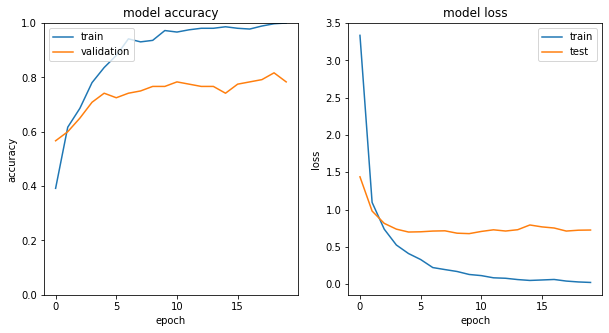

In [39]:
plot_accuracy_loss(history)

In [40]:
preds = np.argmax(model_transfer_full.predict(test_x), axis=1)
print("Accuracy en Test: ", accuracy_score(test_y, preds))
print("Número de imagenes identificadas correctamente: ",
      accuracy_score(test_y, preds, normalize=False), "/", len(test_y),"\n")
confusion_matrix(test_y, preds, labels=range(0,num_classes))

Accuracy en Test:  0.8666666666666667
Número de imagenes identificadas correctamente:  104 / 120 



array([[37,  1,  2],
       [ 1, 35,  4],
       [ 2,  6, 32]])

In [41]:
preds = np.argmax(model_transfer_full.predict(val_x), axis=1)
print("Accuracy en Validación: ", accuracy_score(val_y, preds))
print("Número de imagenes identificadas correctamente: ",
      accuracy_score(val_y, preds, normalize=False), "/", len(val_y),"\n")
confusion_matrix(val_y, preds, labels=range(0,num_classes))

Accuracy en Validación:  0.7833333333333333
Número de imagenes identificadas correctamente:  94 / 120 



array([[35,  2,  3],
       [ 2, 29,  9],
       [ 2,  8, 30]])

##Congelamos la mitad de VGG-16

In [42]:
# load the VGG16 network
print("[INFO] loading network...")
model_vgg = VGG16(weights="imagenet", include_top=False, input_shape=train_x.shape[1:])
 
# Freeze the layers except the last 9 layers
for layer in model_vgg.layers[:-9]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in model_vgg.layers:
    print(layer, layer.trainable)

[INFO] loading network...
<keras.engine.input_layer.InputLayer object at 0x7f18f0191c50> False
<keras.layers.convolutional.Conv2D object at 0x7f18f018cdd0> False
<keras.layers.convolutional.Conv2D object at 0x7f18f0197150> False
<keras.layers.pooling.MaxPooling2D object at 0x7f19df0ab6d0> False
<keras.layers.convolutional.Conv2D object at 0x7f18f0197cd0> False
<keras.layers.convolutional.Conv2D object at 0x7f18f0177510> False
<keras.layers.pooling.MaxPooling2D object at 0x7f18f0197a90> False
<keras.layers.convolutional.Conv2D object at 0x7f18f0138210> False
<keras.layers.convolutional.Conv2D object at 0x7f18f01a3590> False
<keras.layers.convolutional.Conv2D object at 0x7f18f01a9d50> False
<keras.layers.pooling.MaxPooling2D object at 0x7f18f01411d0> True
<keras.layers.convolutional.Conv2D object at 0x7f18f0146f50> True
<keras.layers.convolutional.Conv2D object at 0x7f18f018ced0> True
<keras.layers.convolutional.Conv2D object at 0x7f18f015d410> True
<keras.layers.pooling.MaxPooling2D obj

In [43]:
model_transfer_half = Sequential()
model_transfer_half.add(model_vgg)
model_transfer_half.add(GlobalAveragePooling2D())
model_transfer_half.add(Dropout(0.2))
model_transfer_half.add(Dense(100, activation='relu'))
model_transfer_half.add(Dense(num_classes, activation='softmax'))
model_transfer_half.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               51300     
                                                                 
 dense_6 (Dense)             (None, 3)                 303       
                                                                 
Total params: 14,766,291
Trainable params: 13,030,803
Non-trainable params: 1,735,488
__________________________________

In [44]:
opt = Adam(lr=0.00001)
model_transfer_half.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
history = model_transfer_half.fit(train_x, y_train, batch_size=32, epochs=20,
          validation_data=(val_x, y_val), callbacks=[checkpointer],verbose=1, shuffle=True)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
12/12 [==============================] - ETA: 0s - loss: 2.6797 - accuracy: 0.4639
Epoch 1: val_loss did not improve from 0.67723
12/12 [==============================] - 7s 540ms/step - loss: 2.6797 - accuracy: 0.4639 - val_loss: 1.0515 - val_accuracy: 0.6083
Epoch 2/20
12/12 [==============================] - ETA: 0s - loss: 1.0356 - accuracy: 0.6222
Epoch 2: val_loss did not improve from 0.67723
12/12 [==============================] - 6s 516ms/step - loss: 1.0356 - accuracy: 0.6222 - val_loss: 0.8502 - val_accuracy: 0.6833
Epoch 3/20
12/12 [==============================] - ETA: 0s - loss: 0.5994 - accuracy: 0.7528
Epoch 3: val_loss did not improve from 0.67723
12/12 [==============================] - 6s 518ms/step - loss: 0.5994 - accuracy: 0.7528 - val_loss: 0.7730 - val_accuracy: 0.7000
Epoch 4/20
12/12 [==============================] - ETA: 0s - loss: 0.3812 - accuracy: 0.8417
Epoch 4: val_loss did not improve from 0.67723
12/12 [==============================] - 6s

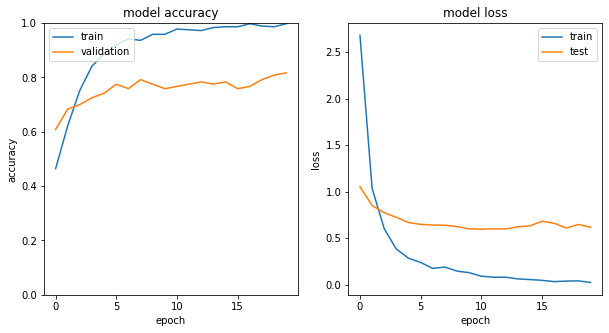

In [45]:
plot_accuracy_loss(history)

In [46]:
preds = np.argmax(model_transfer_half.predict(test_x), axis=1)
print("Accuracy en Test: ", accuracy_score(test_y, preds))
print("Número de imagenes identificadas correctamente: ",
      accuracy_score(test_y, preds, normalize=False), "/", len(test_y),"\n")
confusion_matrix(test_y, preds, labels=range(0,num_classes))

Accuracy en Test:  0.8
Número de imagenes identificadas correctamente:  96 / 120 



array([[38,  1,  1],
       [ 2, 33,  5],
       [10,  5, 25]])

In [47]:
preds = np.argmax(model_transfer_half.predict(val_x), axis=1)
print("Accuracy en Validación: ", accuracy_score(val_y, preds))
print("Número de imagenes identificadas correctamente: ",
      accuracy_score(val_y, preds, normalize=False), "/", len(val_y),"\n")
confusion_matrix(val_y, preds, labels=range(0,num_classes))

Accuracy en Validación:  0.8166666666666667
Número de imagenes identificadas correctamente:  98 / 120 



array([[38,  1,  1],
       [ 5, 28,  7],
       [ 5,  3, 32]])

##Resnet50

In [48]:
# load the Resnet50 network
print("[INFO loading network...")
model_resnet = ResNet50(weights="imagenet", include_top=False, input_shape=train_x.shape[1:])
model_resnet.summary()

[INFO loading network...
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                  

In [49]:
# Check the trainable status of the individual layers
for layer in model_resnet.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f18efce6c10> True
<keras.layers.convolutional.ZeroPadding2D object at 0x7f18efd0c650> True
<keras.layers.convolutional.Conv2D object at 0x7f1966244990> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f18efd01e10> True
<keras.layers.core.activation.Activation object at 0x7f18efd26790> True
<keras.layers.convolutional.ZeroPadding2D object at 0x7f18efd941d0> True
<keras.layers.pooling.MaxPooling2D object at 0x7f18efd188d0> True
<keras.layers.convolutional.Conv2D object at 0x7f18efcd2bd0> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f18efcd2610> True
<keras.layers.core.activation.Activation object at 0x7f18efcdc190> True
<keras.layers.convolutional.Conv2D object at 0x7f18efcdc210> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f18efc65750> True
<keras.layers.core.activation.Activation object at 0x7f18efc6cfd0> True
<keras.layer

In [50]:
model_transfer_resnet = Sequential()
model_transfer_resnet.add(model_resnet)
model_transfer_resnet.add(GlobalAveragePooling2D())
model_transfer_resnet.add(Dropout(0.2))
model_transfer_resnet.add(Dense(100, activation='relu'))
model_transfer_resnet.add(Dense(num_classes, activation='softmax'))
model_transfer_resnet.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_7 (Dropout)         (None, 2048)              0         
                                                                 
 dense_7 (Dense)             (None, 100)               204900    
                                                                 
 dense_8 (Dense)             (None, 3)                 303       
                                                                 
Total params: 23,792,915
Trainable params: 23,739,795
Non-trainable params: 53,120
_____________________________________

In [51]:
opt = Adam(lr=0.00001)
model_transfer_resnet.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

history = model_transfer_resnet.fit(train_x, y_train, batch_size=32, epochs=20,
          validation_data=(val_x, y_val), callbacks=[checkpointer],verbose=1, shuffle=True)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


12/12 [==============================] - ETA: 0s - loss: 1.2678 - accuracy: 0.3167
Epoch 1: val_loss did not improve from 0.59487
12/12 [==============================] - 23s 1s/step - loss: 1.2678 - accuracy: 0.3167 - val_loss: 1.1096 - val_accuracy: 0.4750
Epoch 2/20
12/12 [==============================] - ETA: 0s - loss: 0.9166 - accuracy: 0.5472
Epoch 2: val_loss did not improve from 0.59487
12/12 [==============================] - 9s 717ms/step - loss: 0.9166 - accuracy: 0.5472 - val_loss: 0.9654 - val_accuracy: 0.5500
Epoch 3/20
12/12 [==============================] - ETA: 0s - loss: 0.6990 - accuracy: 0.7222
Epoch 3: val_loss did not improve from 0.59487
12/12 [==============================] - 9s 720ms/step - loss: 0.6990 - accuracy: 0.7222 - val_loss: 0.8523 - val_accuracy: 0.6500
Epoch 4/20
12/12 [==============================] - ETA: 0s - loss: 0.4988 - accuracy: 0.8583
Epoch 4: val_loss did not improve from 0.59487
12/12 [==============================] - 9s 718ms/step -

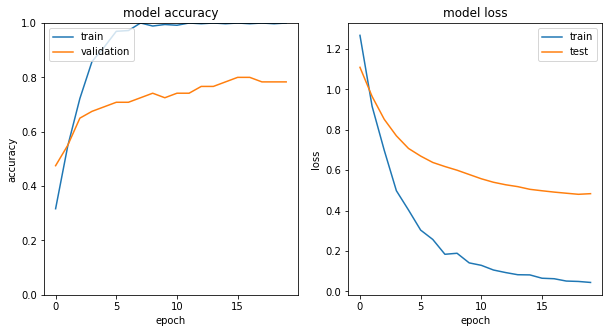

In [52]:
plot_accuracy_loss(history)

In [53]:
preds = np.argmax(model_transfer_resnet.predict(test_x), axis=1)
print("Accuracy en Test: ", accuracy_score(test_y, preds))
print("Número de imagenes identificadas correctamente: ",
      accuracy_score(test_y, preds, normalize=False), "/", len(test_y),"\n")
confusion_matrix(test_y, preds, labels=range(0,num_classes))

Accuracy en Test:  0.8666666666666667
Número de imagenes identificadas correctamente:  104 / 120 



array([[38,  1,  1],
       [ 0, 39,  1],
       [ 4,  9, 27]])

In [54]:
preds = np.argmax(model_transfer_resnet.predict(val_x), axis=1)
print("Accuracy en Validación: ", accuracy_score(val_y, preds))
print("Número de imagenes identificadas correctamente: ",
      accuracy_score(val_y, preds, normalize=False), "/", len(val_y),"\n")
confusion_matrix(val_y, preds, labels=range(0,num_classes))

Accuracy en Validación:  0.7833333333333333
Número de imagenes identificadas correctamente:  94 / 120 



array([[37,  0,  3],
       [ 1, 34,  5],
       [ 5, 12, 23]])

## Resnet50 Congelamos excepto las últimas 6 capas

In [55]:
# Freeze the layers except the last 6 layers
for layer in model_resnet.layers[:-6]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in model_resnet.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f18efce6c10> False
<keras.layers.convolutional.ZeroPadding2D object at 0x7f18efd0c650> False
<keras.layers.convolutional.Conv2D object at 0x7f1966244990> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f18efd01e10> False
<keras.layers.core.activation.Activation object at 0x7f18efd26790> False
<keras.layers.convolutional.ZeroPadding2D object at 0x7f18efd941d0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f18efd188d0> False
<keras.layers.convolutional.Conv2D object at 0x7f18efcd2bd0> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f18efcd2610> False
<keras.layers.core.activation.Activation object at 0x7f18efcdc190> False
<keras.layers.convolutional.Conv2D object at 0x7f18efcdc210> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f18efc65750> False
<keras.layers.core.activation.Activation object at 0x7f18efc6cfd0> False

In [56]:
model_transfer_half_resnet = Sequential()
model_transfer_half_resnet.add(model_resnet)
model_transfer_half_resnet.add(GlobalAveragePooling2D())
model_transfer_half_resnet.add(Dropout(0.2))
model_transfer_half_resnet.add(Dense(100, activation='relu'))
model_transfer_half_resnet.add(Dense(num_classes, activation='softmax'))
model_transfer_half_resnet.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_3   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_8 (Dropout)         (None, 2048)              0         
                                                                 
 dense_9 (Dense)             (None, 100)               204900    
                                                                 
 dense_10 (Dense)            (None, 3)                 303       
                                                                 
Total params: 23,792,915
Trainable params: 1,260,947
Non-trainable params: 22,531,968
__________________________________

In [57]:
opt = Adam(lr=0.00001)
model_transfer_half_resnet.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

history = model_transfer_half_resnet.fit(train_x, y_train, batch_size=32, epochs=20,
          validation_data=(val_x, y_val), callbacks=[checkpointer],verbose=1, shuffle=True)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
12/12 [==============================] - ETA: 0s - loss: 1.3674 - accuracy: 0.3083
Epoch 1: val_loss did not improve from 0.48098
12/12 [==============================] - 9s 389ms/step - loss: 1.3674 - accuracy: 0.3083 - val_loss: 1.0888 - val_accuracy: 0.4667
Epoch 2/20
12/12 [==============================] - ETA: 0s - loss: 1.2123 - accuracy: 0.4000
Epoch 2: val_loss did not improve from 0.48098
12/12 [==============================] - 3s 284ms/step - loss: 1.2123 - accuracy: 0.4000 - val_loss: 0.9950 - val_accuracy: 0.4917
Epoch 3/20
12/12 [==============================] - ETA: 0s - loss: 1.0573 - accuracy: 0.5111
Epoch 3: val_loss did not improve from 0.48098
12/12 [==============================] - 3s 284ms/step - loss: 1.0573 - accuracy: 0.5111 - val_loss: 0.9174 - val_accuracy: 0.5667
Epoch 4/20
12/12 [==============================] - ETA: 0s - loss: 0.9312 - accuracy: 0.5694
Epoch 4: val_loss did not improve from 0.48098
12/12 [==============================] - 3s

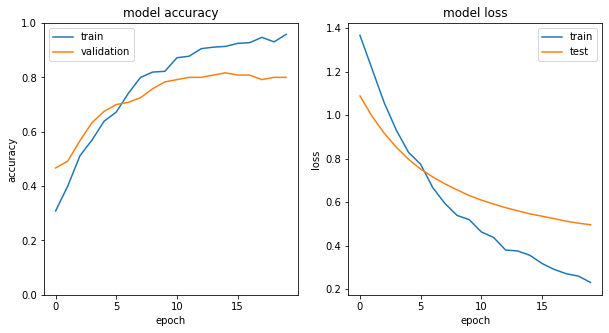

In [58]:
plot_accuracy_loss(history)

In [59]:
preds = np.argmax(model_transfer_half_resnet.predict(test_x), axis=1)
print("Accuracy en Test: ", accuracy_score(test_y, preds))
print("Número de imagenes identificadas correctamente: ",
      accuracy_score(test_y, preds, normalize=False), "/", len(test_y),"\n")
confusion_matrix(test_y, preds, labels=range(0,num_classes))

Accuracy en Test:  0.7916666666666666
Número de imagenes identificadas correctamente:  95 / 120 



array([[33,  1,  6],
       [ 1, 33,  6],
       [ 4,  7, 29]])

In [60]:
preds = np.argmax(model_transfer_half_resnet.predict(val_x), axis=1)
print("Accuracy en Validación: ", accuracy_score(val_y, preds))
print("Número de imagenes identificadas correctamente: ",
      accuracy_score(val_y, preds, normalize=False), "/", len(val_y),"\n")
confusion_matrix(val_y, preds, labels=range(0,num_classes))

Accuracy en Validación:  0.8
Número de imagenes identificadas correctamente:  96 / 120 



array([[34,  2,  4],
       [ 2, 32,  6],
       [ 3,  7, 30]])

##Comprobaciones Test

Ground truth:  0   Bread
Predict:       0   Bread


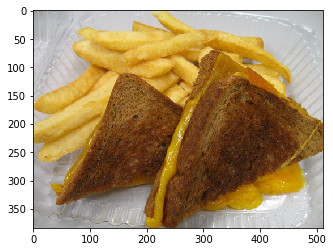

In [61]:
id=52

image = img.imread(list_train[id])
plt.imshow(image[:,:,:], cmap='gray', vmin = 0, vmax = 255,interpolation='none')
print("Ground truth: ", y_train[id].argmax(), " ", food_classes[y_train[id].argmax()])
#plt.imshow(train_x[id])

p = model_transfer_half_resnet.predict(np.expand_dims(train_x[id], axis=0))
print("Predict:      ", p.argmax(), " ", food_classes[p.argmax()])

##Comprobaciones Validacion

Ground truth:  1   Dairy product
Predict:       1   Dairy product


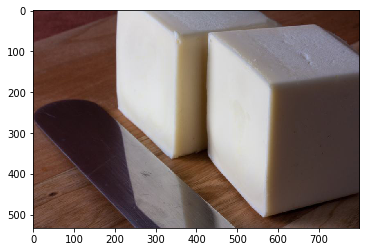

In [62]:
id=49

image = img.imread(list_val[id])
plt.imshow(image[:,:,:], cmap='gray', vmin = 0, vmax = 255,interpolation='none')
print("Ground truth: ", y_val[id].argmax(), " ", food_classes[y_val[id].argmax()])

p = model_transfer_half_resnet.predict(np.expand_dims(val_x[id], axis=0))
print("Predict:      ", p.argmax(), " ", food_classes[p.argmax()])

##Comprobaciones Imagenes 'Mias'

convertida: 1  de  1
Ground truth:  0   Bread
Predict:       0   Bread 0.9849408


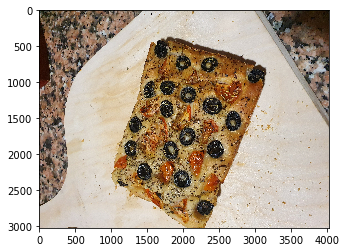

In [66]:
cl='0'

img_mia = '/content/drive/MyDrive/IA3/Datasets/mi_food/0_' + cl + '.jpg'
image = img.imread(img_mia)
plt.imshow(image[:,:,:], cmap='gray', vmin = 0, vmax = 255,interpolation='none')
mia_x = create_features([img_mia])

print("Ground truth: ", int(cl), " ", food_classes[int(cl)])
p = model_transfer_half.predict(np.expand_dims(mia_x[0], axis=0))
print("Predict:      ", p.argmax(), " ", food_classes[p.argmax()], p.max())

convertida: 1  de  1
Ground truth:  1   Dairy product
Predict:       1   Dairy product 0.9231406


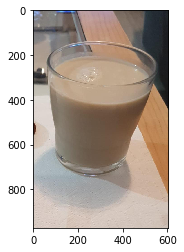

In [67]:
cl='1'

img_mia = '/content/drive/MyDrive/IA3/Datasets/mi_food/0_' + cl + '.jpg'
image = img.imread(img_mia)
plt.imshow(image[:,:,:], cmap='gray', vmin = 0, vmax = 255,interpolation='none')
mia_x = create_features([img_mia])

print("Ground truth: ", int(cl), " ", food_classes[int(cl)])
p = model_transfer_half.predict(np.expand_dims(mia_x[0], axis=0))
print("Predict:      ", p.argmax(), " ", food_classes[p.argmax()], p.max())

convertida: 1  de  1
Ground truth:  2   Dessert
Predict:       2   Dessert 0.9998981


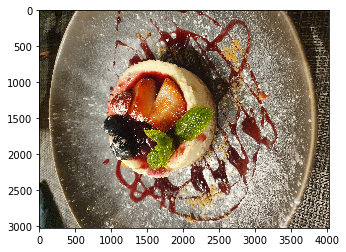

In [68]:
cl='2'

img_mia = '/content/drive/MyDrive/IA3/Datasets/mi_food/0_' + cl + '.jpg'
image = img.imread(img_mia)
plt.imshow(image[:,:,:], cmap='gray', vmin = 0, vmax = 255,interpolation='none')
mia_x = create_features([img_mia])

print("Ground truth: ", int(cl), " ", food_classes[int(cl)])
p = model_transfer_half.predict(np.expand_dims(mia_x[0], axis=0))
print("Predict:      ", p.argmax(), " ", food_classes[p.argmax()], p.max())